<a href="https://colab.research.google.com/github/thien1892/Deep-Learning-for-Computer-Vision/blob/main/2_2_How_to_Perform_Object_Detection_With_YOLOv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Perform Object Detection With YOLOv3

In [1]:
!git clone https://github.com/thien1892/Deep-Learning-for-Computer-Vision.git

Cloning into 'Deep-Learning-for-Computer-Vision'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 69 (delta 31), reused 39 (delta 12), pack-reused 0
Unpacking objects: 100% (69/69), done.


In [2]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/content/Deep-Learning-for-Computer-Vision/Object detetion_Xac dinh vat the')

from yolo3 import *


# load weights

In [3]:
from urllib.request import urlretrieve
url = 'https://pjreddie.com/media/files/yolov3.weights'
urlretrieve(url, '/content/yolov3.weights')

('/content/yolov3.weights', <http.client.HTTPMessage at 0x7fa26c961910>)

In [4]:
# make the yolov3 model to predict 80 classes on COCO
yolov3 = make_yolov3_model()

# load the weights trained on COCO into the model
weight_reader = WeightReader('yolov3.weights')
weight_reader.load_weights(yolov3)

# save the model to file
yolov3.save('model.h5')

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


# Load image:

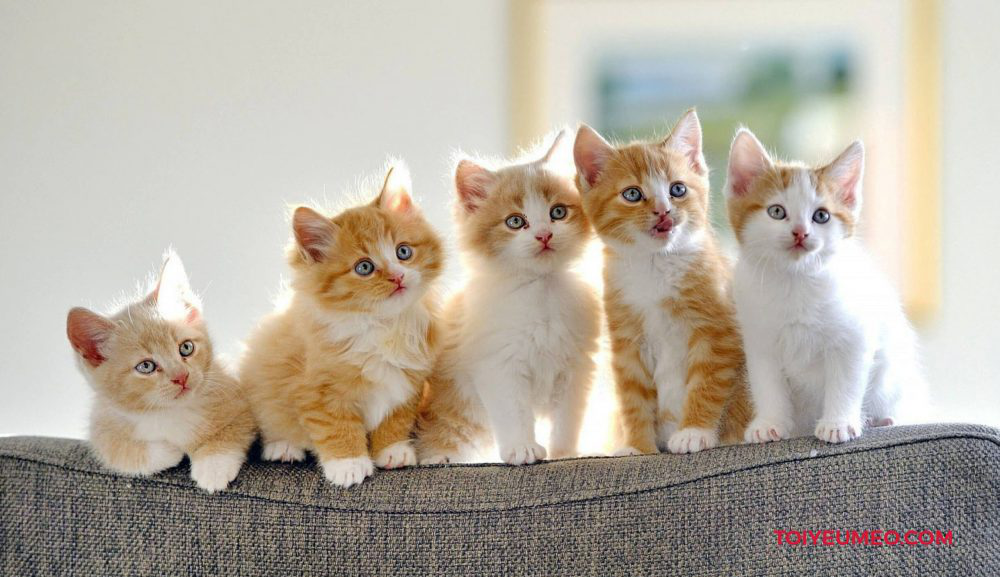

In [5]:
from urllib.request import urlretrieve
url = 'https://toiyeumeo.com/wp-content/uploads/2021/03/hinh-anh-meo-xinh-ngo-nghinh-1000x577.jpg'
urlretrieve(url, 'anh.jpg')

# Open image
import PIL.Image as Image
Image.open('anh.jpg')

[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]
cat 99.24017786979675
cat 99.36869144439697
sofa 79.50810194015503
cat 99.33683276176453
cat 99.51626062393188
cat 93.1526243686676


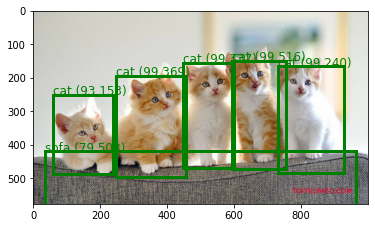

In [6]:
# load yolov3 model
model = load_model('model.h5')
# define the expected input shape for the model
input_w, input_h = 416, 416
# define our new photo
photo_filename = 'anh.jpg'
# load and prepare image
image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))
# make prediction
yhat = model.predict(image)
# summarize the shape of the list of arrays
print([a.shape for a in yhat])
# define the anchors
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]
# define the probability threshold for detected objects
class_threshold = 0.6
boxes = list()
for i in range(len(yhat)):
	# decode the output of the network
	boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, input_h, input_w)
# correct the sizes of the bounding boxes for the shape of the image
correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)
# suppress non-maximal boxes
do_nms(boxes, 0.5)
# define the labels
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck",
	"boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
	"bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
	"backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
	"sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
	"tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
	"apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
	"chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse",
	"remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
	"book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]
# get the details of the detected objects
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)
# summarize what we found
for i in range(len(v_boxes)):
	print(v_labels[i], v_scores[i])
# draw what we found
draw_boxes(photo_filename, v_boxes, v_labels, v_scores)